# Шаг 1: Подготовка

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
data = pd.read_csv('data.csv')
data.shape

(35218, 156)

In [3]:
# Последняя колонка - это целевая переменная
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 2: Обучение моделей

In [4]:
# 1. Логистическая регрессия
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [5]:
# 2. SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [6]:
# 3. Дерево решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [7]:
# Оценка качества моделей
metrics = {
    'Logistic Regression': (y_pred_log_reg, log_reg),
    'SVM': (y_pred_svm, svm),
    'Decision Tree': (y_pred_tree, tree)
}

In [8]:
for model_name, (y_pred, model) in metrics.items():
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Logistic Regression - Accuracy: 0.9120, F1 Score: 0.9119
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      3540
         1.0       0.94      0.88      0.91      3504

    accuracy                           0.91      7044
   macro avg       0.91      0.91      0.91      7044
weighted avg       0.91      0.91      0.91      7044

[[3330  210]
 [ 410 3094]]
SVM - Accuracy: 0.9177, F1 Score: 0.9172
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92      3540
         1.0       0.98      0.85      0.91      3504

    accuracy                           0.92      7044
   macro avg       0.93      0.92      0.92      7044
weighted avg       0.93      0.92      0.92      7044

[[3491   49]
 [ 531 2973]]
Decision Tree - Accuracy: 0.9989, F1 Score: 0.9989
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3540
         1.0       1.00      1.00 

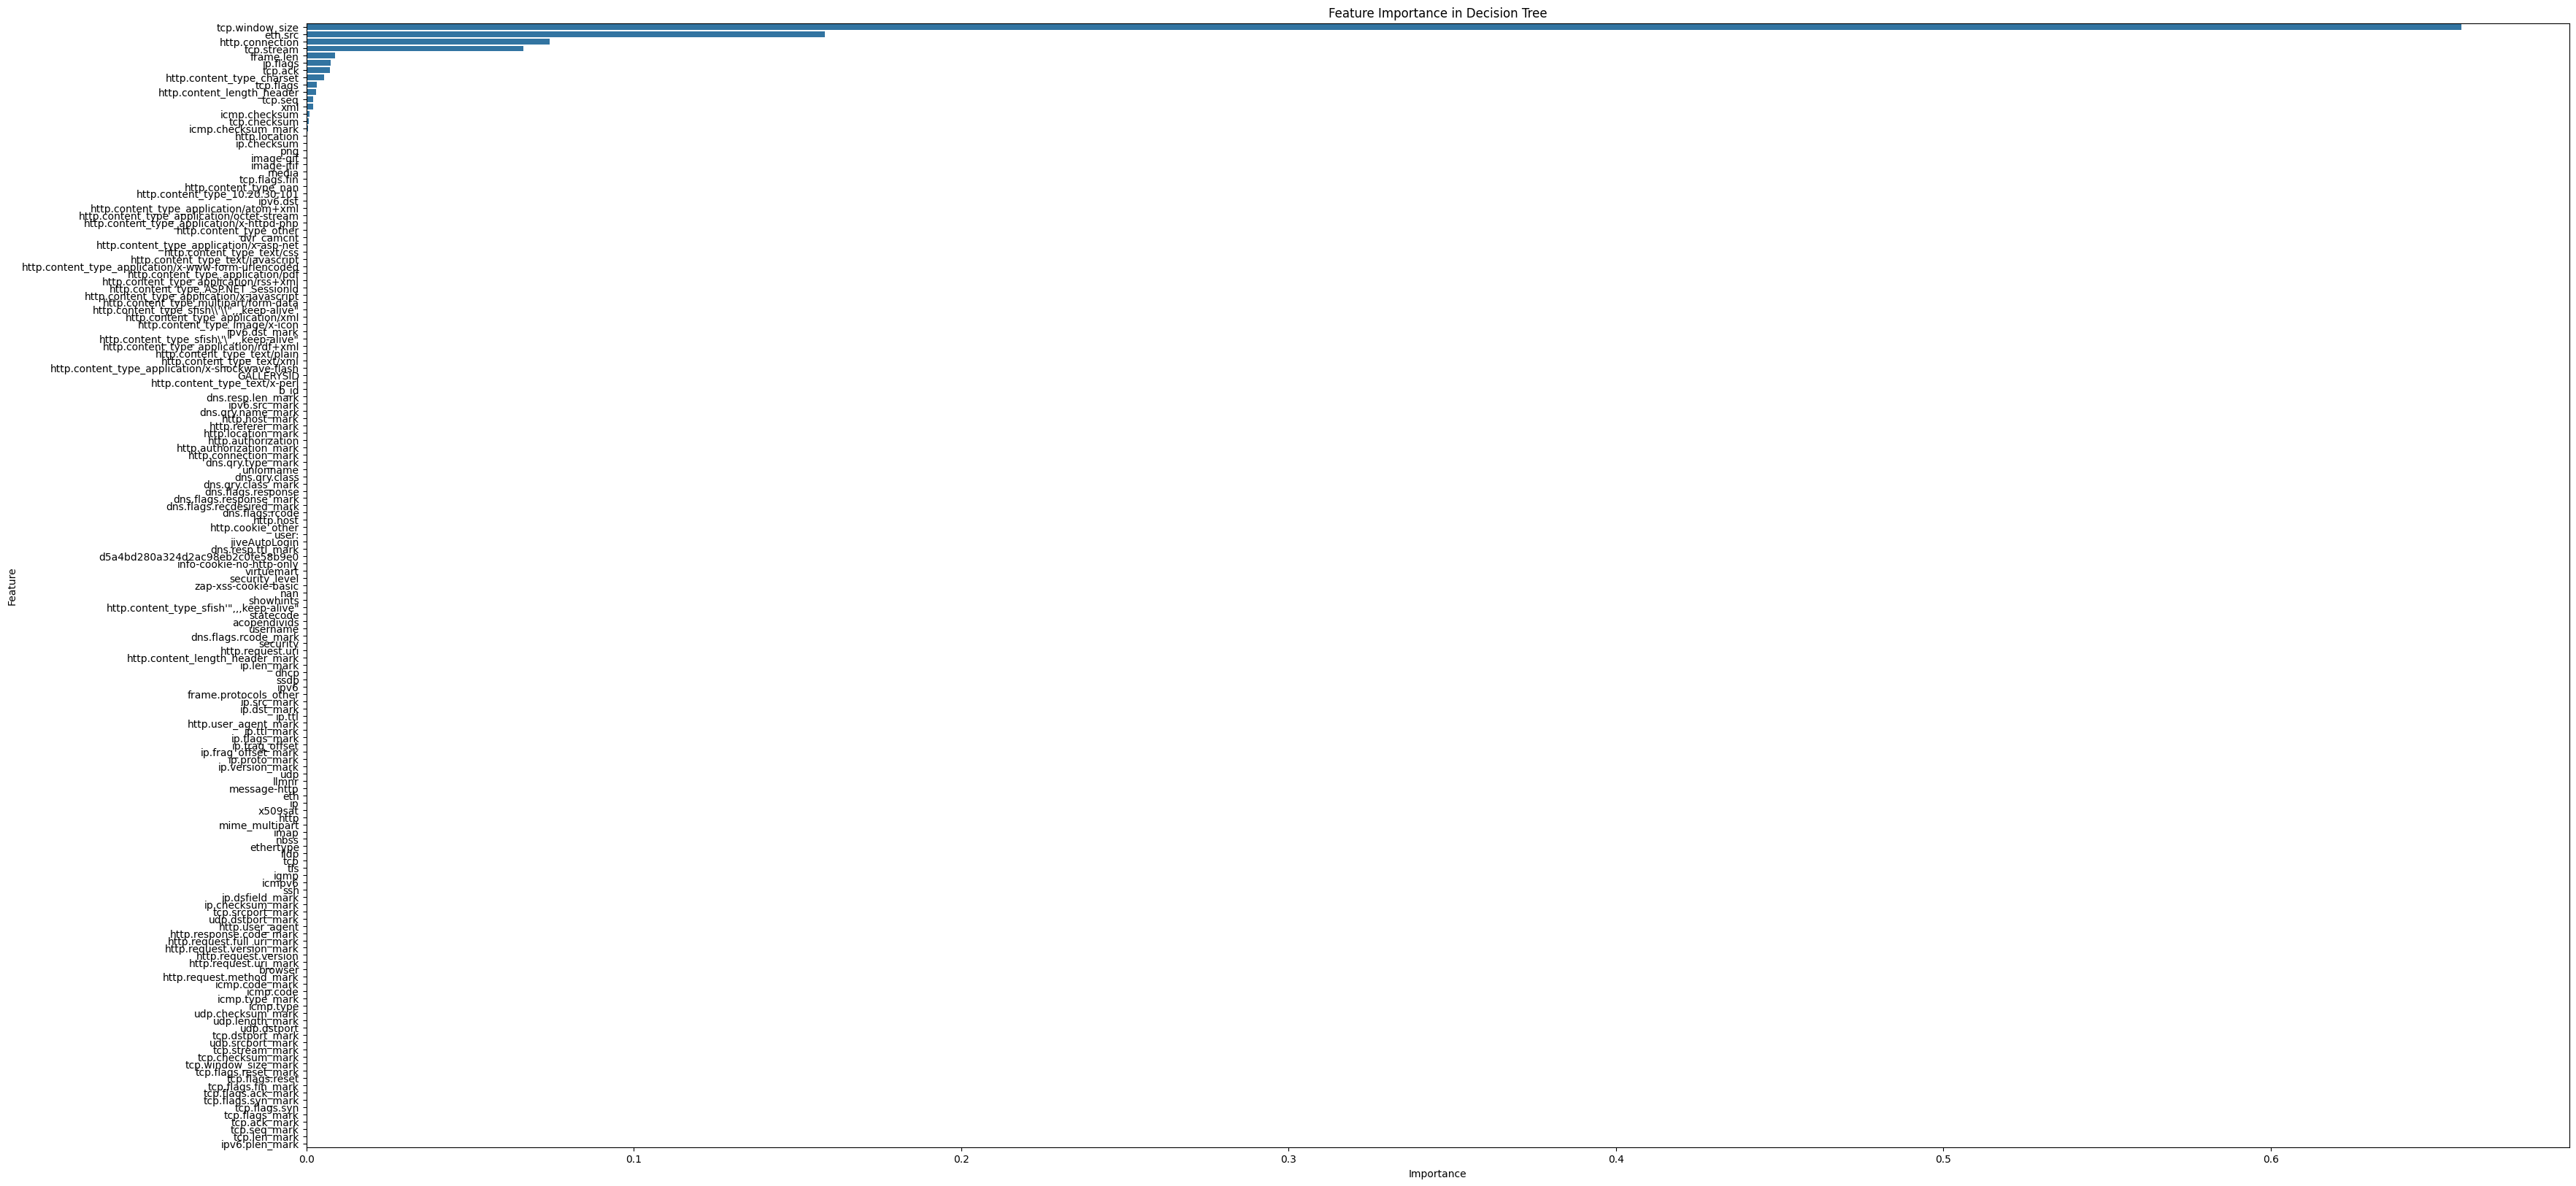

In [10]:
# Построение графика важности признаков для дерева решений
feature_importances = tree.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(40, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Decision Tree')
plt.show()

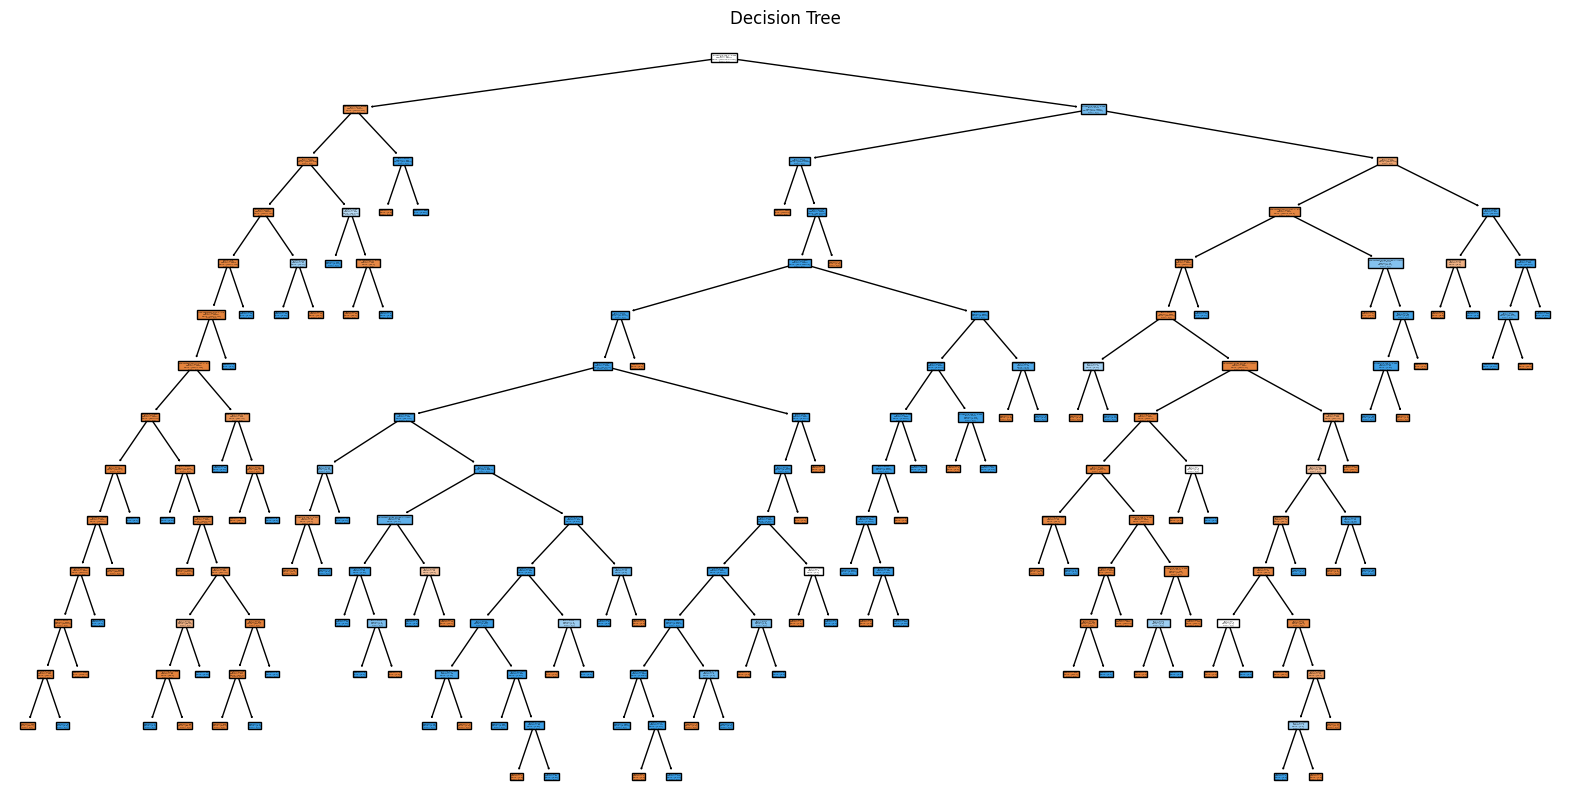

In [11]:
# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=True, filled=True)
plt.title('Decision Tree')
plt.show()

In [12]:
# Вывод правил дерева решений в текстовом виде
tree_rules = export_text(tree, feature_names=list(features))
print(tree_rules)

|--- tcp.window_size <= 0.01
|   |--- http.connection <= 0.62
|   |   |--- eth.src <= 0.50
|   |   |   |--- tcp.flags <= 0.46
|   |   |   |   |--- xml <= 0.50
|   |   |   |   |   |--- icmp.checksum_mark <= 0.50
|   |   |   |   |   |   |--- http.content_type_charset <= 0.50
|   |   |   |   |   |   |   |--- tcp.ack <= 0.01
|   |   |   |   |   |   |   |   |--- tcp.stream <= 0.98
|   |   |   |   |   |   |   |   |   |--- tcp.stream <= 0.42
|   |   |   |   |   |   |   |   |   |   |--- tcp.stream <= 0.42
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- tcp.stream >  0.42
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- tcp.stream >  0.42
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- tcp.stream >  0.98
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- tcp.ack >  0.01
|   |   |   |   |   |  